In [111]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing as p

In [112]:
data=pd.read_csv('boston_housing.csv')
feat_len=len(data.columns)-1
index_len=len(data.index)
data.loc[0]

CRIM         0.00632
ZN          18.00000
INDUS        2.31000
CHAS         0.00000
NOX          0.53800
RM           6.57500
AGE         65.20000
DIS          4.09000
RAD          1.00000
TAX        296.00000
PTRATIO     15.30000
B          396.90000
LSTAT        4.98000
MEDV        24.00000
Name: 0, dtype: float64

In [113]:
X=np.empty([len(data.index),feat_len])

In [114]:
for i in range(index_len):
    for j in range(feat_len):
        X[i][j]=data.iloc[i][data.columns[j]]

In [115]:
Y=data['MEDV']
Y = np.expand_dims(Y, axis=0)
Y=Y.T
print(Y.shape)
Y

(506, 1)


array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2],
       [28.7],
       [22.9],
       [27.1],
       [16.5],
       [18.9],
       [15. ],
       [18.9],
       [21.7],
       [20.4],
       [18.2],
       [19.9],
       [23.1],
       [17.5],
       [20.2],
       [18.2],
       [13.6],
       [19.6],
       [15.2],
       [14.5],
       [15.6],
       [13.9],
       [16.6],
       [14.8],
       [18.4],
       [21. ],
       [12.7],
       [14.5],
       [13.2],
       [13.1],
       [13.5],
       [18.9],
       [20. ],
       [21. ],
       [24.7],
       [30.8],
       [34.9],
       [26.6],
       [25.3],
       [24.7],
       [21.2],
       [19.3],
       [20. ],
       [16.6],
       [14.4],
       [19.4],
       [19.7],
       [20.5],
       [25. ],
       [23.4],
       [18.9],
       [35.4],
       [24.7],
       [31.6],
       [23.3],
       [19.6],
       [18.7],
       [16. ],
       [22.2],
       [25. ],
       [33. ],
       [23.5],
       [19

In [160]:
#X = p.scale(X)
for i in range(feat_len):
    mean_x=np.mean(X[:,i])
    std_dev_x=np.std(X[:,i])
    X[:,i]=(X[:,i]-mean_x)/std_dev_x
Y= p.scale(Y)

In [161]:
X[1:5,:]

array([[-0.41733926, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         0.19427445,  0.36716642,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         1.28271368, -0.26581176,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.39642699, -1.2087274 ],
       [-0.41675042, -0.48772236, -1.30687771, -0.27259857, -0.83528384,
         1.01630251, -0.80988851,  1.07773662, -0.75292215, -1.10611514,
         0.1130321 ,  0.41616284, -1.36151682],
       [-0.41248185, -0.48772236, -1.30687771, -0.27259857, -0.83528384,
         1.22857665, -0.51117971,  1.07773662, -0.75292215, -1.10611514,
         0.1130321 ,  0.44105193, -1.02650148]])

In [162]:
print(np.mean(X))
print(np.std(X))
print(np.mean(Y))
print(np.std(Y))

-1.7282888069567655e-17
1.0
-1.4042346556523718e-17
1.0


In [163]:
print(X.shape)
print(Y.shape)
m=13

(506, 13)
(506, 1)


In [164]:
#GRADIENT DESCENT
def gradient_descent(x, y, theta, iterations, alpha):
  
    past_costs = []
     
    past_thetas = [theta]
   
    for i in range(iterations):
          
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs


In [211]:
theta=np.random.rand(13,1)
theta

array([[0.14357347],
       [0.06580727],
       [0.09357398],
       [0.28923539],
       [0.95468678],
       [0.86059387],
       [0.79123982],
       [0.85338736],
       [0.07882324],
       [0.69637913],
       [0.74009565],
       [0.7596819 ],
       [0.30455289]])

In [267]:

costs=[]
theta,costs=gradient_descent(X,Y,theta,150,0.001)


In [268]:
theta=theta[-1]


In [269]:
print(theta)
print(theta.shape)
cost_new=np.asarray(costs)
cost_new=cost_new[:,:,0]
theta

[[-2.32589284e+32]
 [ 4.11027094e+32]
 [ 1.27023395e+33]
 [-1.82143568e+32]
 [-2.11207220e+32]
 [-2.29175290e+32]
 [ 1.90730243e+32]
 [ 9.36069950e+31]
 [ 3.21152643e+33]
 [-3.65556927e+33]
 [-1.15225614e+32]
 [ 2.31851500e+31]
 [-1.22045739e+32]]
(13, 1)


array([[-2.32589284e+32],
       [ 4.11027094e+32],
       [ 1.27023395e+33],
       [-1.82143568e+32],
       [-2.11207220e+32],
       [-2.29175290e+32],
       [ 1.90730243e+32],
       [ 9.36069950e+31],
       [ 3.21152643e+33],
       [-3.65556927e+33],
       [-1.15225614e+32],
       [ 2.31851500e+31],
       [-1.22045739e+32]])

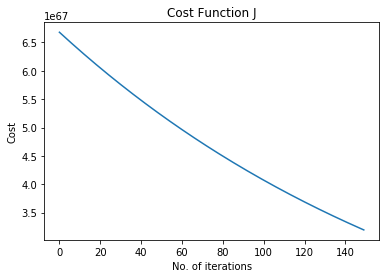

In [270]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')

plt.plot(cost_new)
plt.show()

In [271]:
Y1=np.array([0.085, 13.0, 10.5, 1.0, 0.8, 4.78, 39.0, 5.5, 5.5, 331.0, 13.3, 390.5, 17.71])
Y2=np.array([0.17899, 0, 9.69, 0, 0.585, 5.67, 28.8, 2.7986, 6, 391, 19.2, 393.29, 17.6])

Y1 = np.expand_dims(Y1, axis=0)
Y2 = np.expand_dims(Y2, axis=0)
Y1.shape

(1, 13)

In [272]:
pred_1=np.dot(Y1,theta)
pred_2=np.dot(Y2,theta)

In [273]:
pred_1

array([[-1.16180237e+36]])

In [274]:
pred_2

array([[-1.38870132e+36]])